In [1]:
import numpy as np
from shutil import rmtree
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

# Carga de datos

Se abren todas las configuraciones `xxxxx.xsf` para leer la energia en la primera linea, de aqui se extrae la informacion.

In [2]:
# confs_E = []
# confZ = []
# lineas = open('NN_NICO/00022.xsf', 'r').readlines()
# confs_E.append(float(lineas[0].split()[-2]))
# confZ.append(float(lineas[-1].split()[3]))
# lineas[-1].split()[3]

In [3]:
E0 = -155.82150402  

def read_energies(confs):

    confs_E = []
    conf_Z_c = []
    conf_list = os.listdir(confs)

    for conf in conf_list:
        Lines = open(os.path.join(confs,conf), 'r').readlines()
        confs_E.append(float(Lines[0].split()[-2]))
        conf_Z_c.append(float(Lines[-1].split()[3]))

    df = pd.DataFrame([conf_list, confs_E,conf_Z_c]).T
    df.columns=['conf','E_dft', 'Z_C']
    return df

In [4]:
df_Nico = read_energies('NN_NICO')
df_NN5 = read_energies('NN5')
df_NN10 = read_energies('NN10')
df_NN15 = read_energies('NN15')
df_Nico['NN'] = '0'
df_NN5['NN']  = '5'
df_NN10['NN'] = '10'
df_NN15['NN'] = '15'

In [5]:
print(df_Nico.E_dft.max(), df_NN5.E_dft.max(),  df_NN10.E_dft.max(),  df_NN15.E_dft.max())

-140.4734422 -140.00245192 -140.12733696 -143.14905875


In [6]:
print(df_Nico.E_dft.min(), df_NN5.E_dft.min(),  df_NN10.E_dft.min(),  df_NN15.E_dft.min())

-156.11656366 -155.9648705 -155.56527522 -155.91663443


In [7]:
xsf1 = -136.1472 /56
xsf2 = -136.27099548 /56
print(xsf1,xsf2)

-2.4312 -2.433410633571429


In [8]:
df_Nico['NN'] = '0'
df_Nico['E_dft'] = df_Nico['E_dft'] - E0
df_NN5['NN']  = '5'
df_NN5['E_dft'] = df_NN5['E_dft'] - E0

df_NN10['NN'] = '10'
df_NN10['E_dft'] = df_NN10['E_dft'] - E0

df_NN15['NN'] = '15'
df_NN15['E_dft'] = df_NN15['E_dft'] - E0


In [9]:
df = pd.concat([df_Nico, df_NN5, df_NN10, df_NN15])

#  Histograma de Energía

## DB inicial

In [10]:
df_Nico['E_dft'] =df_Nico['E_dft'] +155.821504

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


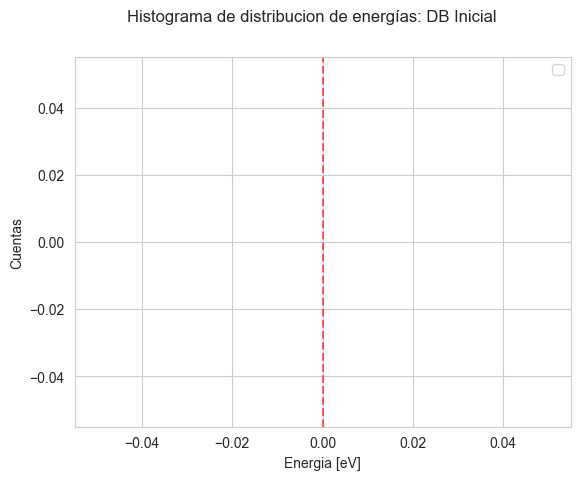

In [11]:
E_low = df_Nico.query(' E_dft < 3')
E_high = df_Nico.query('E_dft > 3')

fig, ax = plt.subplots()
sns.histplot(df_Nico.query('E_dft < 8')['E_dft'],  bins=50, ax=ax, alpha=0.7) 

ax.axvline(x=0, color = 'red', linestyle='--', alpha=0.6)
ax.set_ylabel('Cuentas')
ax.set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías: DB Inicial ')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


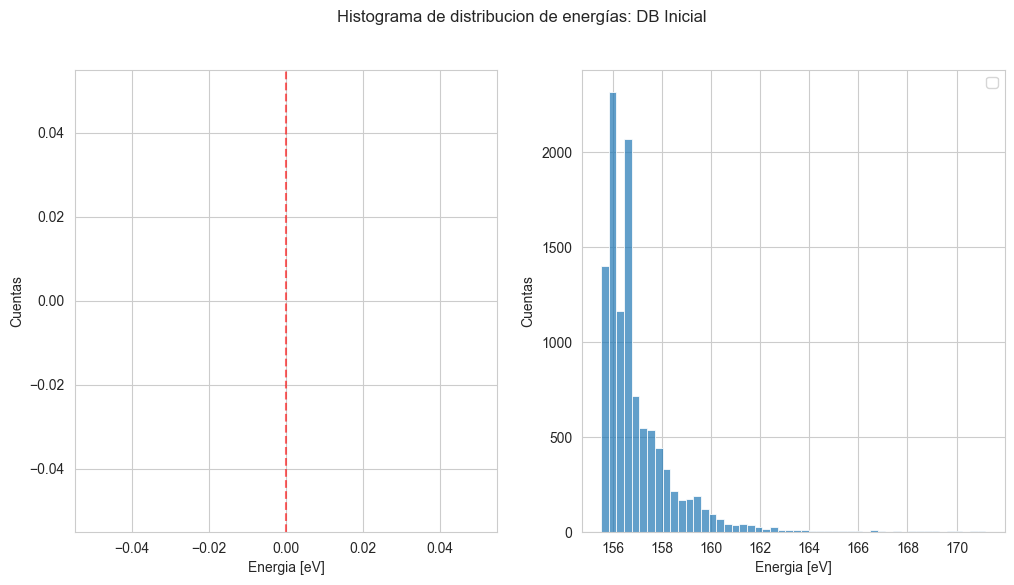

In [12]:
E_low = df_Nico.query(' E_dft < 3')
E_high = df_Nico.query('E_dft > 3')

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=0, color = 'red', linestyle='--', alpha=0.6)
ax[0].set_ylabel('Cuentas')
ax[1].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías: DB Inicial ')
plt.legend()
plt.show()

## NN5
Contiene
- RS
- Slabmotion
- problematicas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


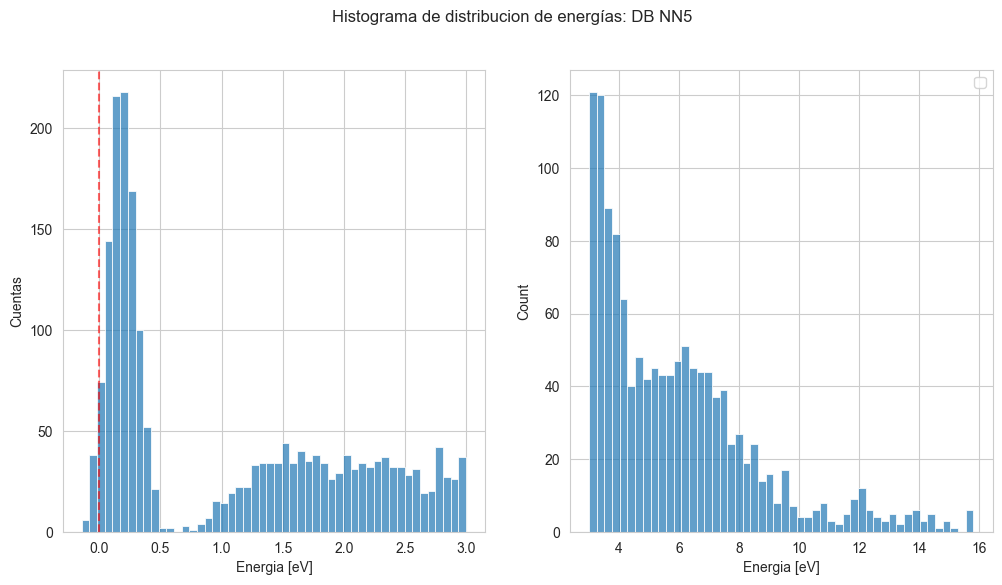

In [13]:
E_low = df_NN5.query(' E_dft < 3')
E_high = df_NN5.query('E_dft > 3')

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=0, color = 'red', linestyle='--', alpha=0.6)
ax[0].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías: DB NN5')
plt.legend()
plt.show()

## DB 10

Contiene
- RS
- slabm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


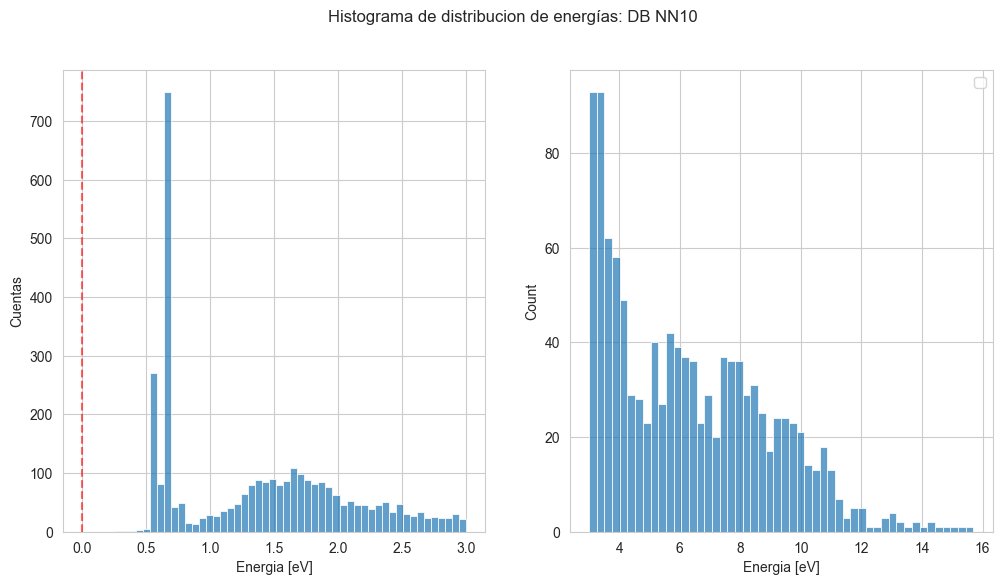

In [14]:
E_low = df_NN10.query(' E_dft < 3')
E_high = df_NN10.query('E_dft > 3')

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=0, color = 'red', linestyle='--', alpha=0.6)
ax[0].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías: DB NN10')
plt.legend()
plt.show()

## DB 15

Contiene
- RS
- MD
- TS
- modos normales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


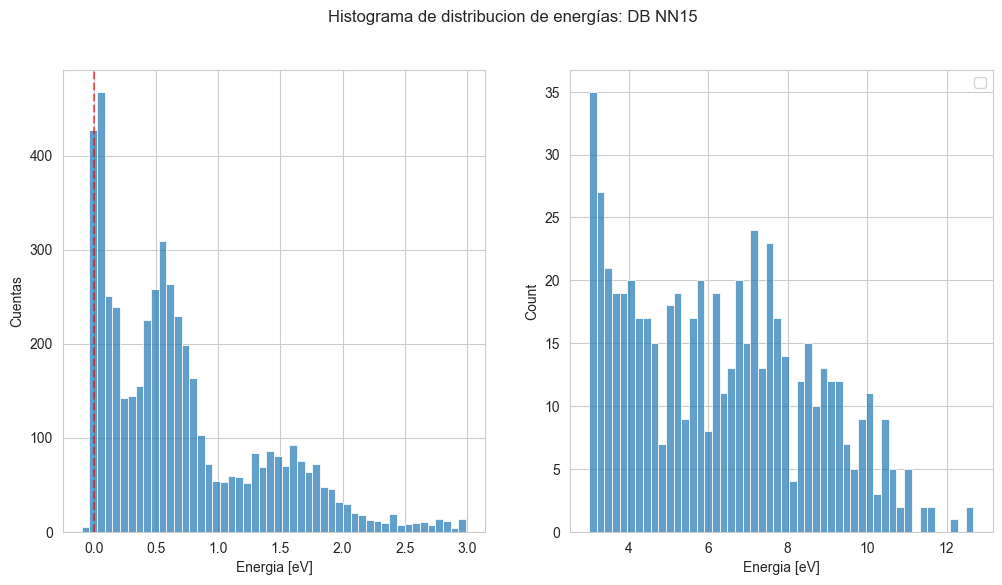

In [15]:
E_low = df_NN15.query(' E_dft < 3')
E_high = df_NN15.query('E_dft > 3')

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=0, color = 'red', linestyle='--', alpha=0.6)
ax[0].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías: DB NN15')
plt.legend()
plt.show()

In [16]:
df.NN.replace(['15','10','5'], 'final', inplace= True)
df.NN.replace(['0'], 'inicial', inplace= True)

In [17]:
import matplotlib.pyplot as plt

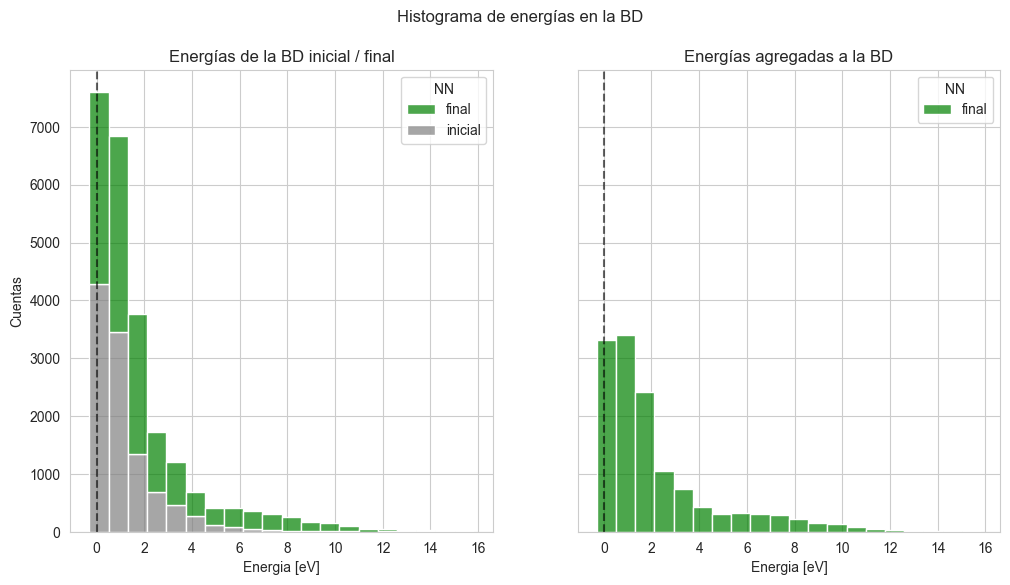

In [18]:


fig, ax = plt.subplots(1,2, figsize = (12,6),sharey=True)
sns.set_palette(['g','gray'])
sns.histplot(data=df, x='E_dft', hue='NN', multiple='stack' ,bins=20, ax=ax[0], alpha=0.7, hue_order=['final','inicial'])
sns.histplot(data=df, x='E_dft', hue='NN', multiple='stack', bins=20, ax=ax[1], alpha=0.7, hue_order=['final'])

ax[0].axvline(x=0, color = 'black', linestyle='--', alpha=0.6)
ax[1].axvline(x=0, color = 'black', linestyle='--', alpha=0.6)
# ax[0].text(0.1,1750, '$V_{ref}$ = 0')
# ax[0].axhline(y=400, color = 'black', linestyle='--', alpha=0.6)
# ax[1].axhline(y=400, color = 'black', linestyle='--', alpha=0.6)


ax[0].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_ylabel('Cuentas')
ax[1].set_xlabel('Energia [eV]')
ax[0].set_title('Energías de la BD inicial / final')
ax[1].set_title('Energías agregadas a la BD')
plt.suptitle('Histograma de energías en la BD')
plt.show()

# Comparacion calidad de predicción

In [19]:
E_ref_ini = -155.819905064064   
E_ref_15  = -155.846302046530

NN15 = pd.read_csv('NN15_E_DB_ALL.dat', delim_whitespace=True)
NN15['delta_V'] =  NN15['E_ann'] - NN15['E_dft'] 
NN15['DFT']= NN15['E_dft'] - E0
NN15['ANN']= NN15['E_ann'] - E_ref_15
NNini = pd.read_csv('NNini_E_DB_ALL.dat', delim_whitespace=True)
NNini['delta_V'] = NNini['E_dft'] - NNini['E_ann']
NNini['DFT']= NNini['E_dft'] - E0
NNini['ANN']= NNini['E_ann'] - E_ref_ini



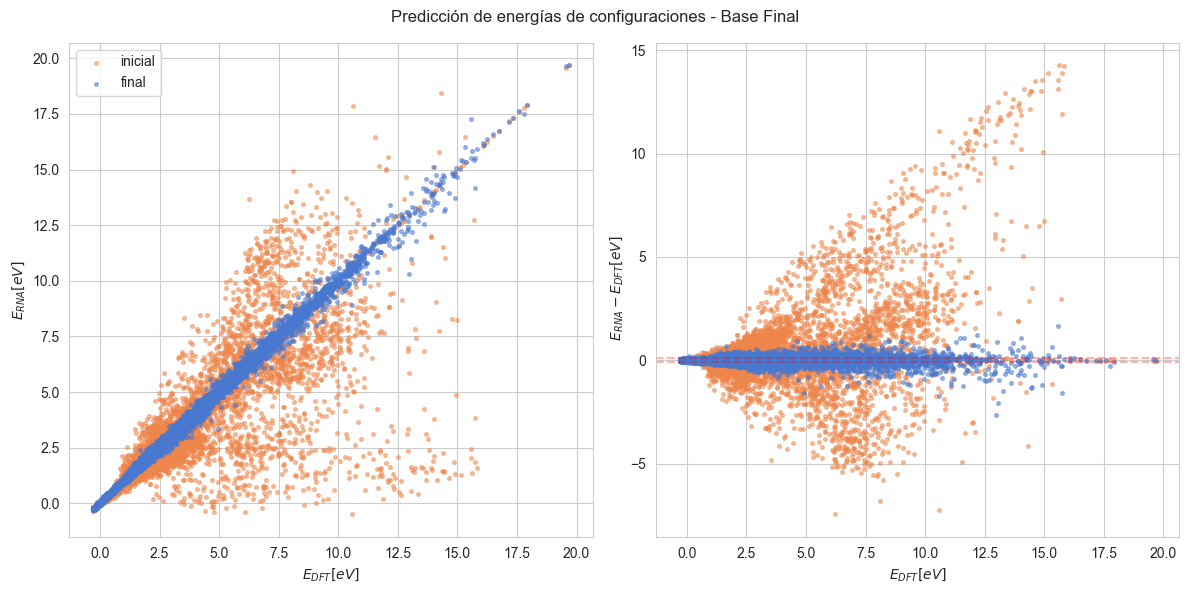

In [20]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2, figsize=(12,6))


NNini.plot(kind='scatter', x='DFT', y='ANN', ax=ax[0], color = sns.color_palette("muted")[1]  ,  s=7 , alpha=0.5, label='inicial')
NN15.plot( kind='scatter', x='DFT', y='ANN', ax=ax[0], color = sns.color_palette("muted")[0], s=7 , alpha=0.5, label='final')
ax[0].legend()
ax[0].set_ylabel('$E_{RNA} [eV] $')
ax[0].set_xlabel('$E_{DFT} [eV] $')

sns.set_style('whitegrid')
NNini.plot(kind='scatter', x='DFT', y='delta_V', ax=ax[1], color = sns.color_palette("muted")[1]  ,  s=7 , alpha=0.5, label=None)
NN15.plot( kind='scatter', x='DFT', y='delta_V', ax=ax[1], color = sns.color_palette("muted")[0], s=7 , alpha=0.5, label=None)
ax[1].axhline(y=0.1 , color='red', linestyle = '--', alpha=0.3)
ax[1].axhline(y=-0.1, color='red', linestyle = '--', alpha=0.3)
ax[1].set_ylabel(' $ E_{RNA} - E_{DFT}[eV] $')
ax[1].set_xlabel('$E_{DFT} [eV]$')
fig.suptitle('Predicción de energías de configuraciones - Base Final')
fig.tight_layout()
plt.show()

In [21]:
line = np.linspace(-0.5,20,100)
line

array([-0.5       , -0.29292929, -0.08585859,  0.12121212,  0.32828283,
        0.53535354,  0.74242424,  0.94949495,  1.15656566,  1.36363636,
        1.57070707,  1.77777778,  1.98484848,  2.19191919,  2.3989899 ,
        2.60606061,  2.81313131,  3.02020202,  3.22727273,  3.43434343,
        3.64141414,  3.84848485,  4.05555556,  4.26262626,  4.46969697,
        4.67676768,  4.88383838,  5.09090909,  5.2979798 ,  5.50505051,
        5.71212121,  5.91919192,  6.12626263,  6.33333333,  6.54040404,
        6.74747475,  6.95454545,  7.16161616,  7.36868687,  7.57575758,
        7.78282828,  7.98989899,  8.1969697 ,  8.4040404 ,  8.61111111,
        8.81818182,  9.02525253,  9.23232323,  9.43939394,  9.64646465,
        9.85353535, 10.06060606, 10.26767677, 10.47474747, 10.68181818,
       10.88888889, 11.0959596 , 11.3030303 , 11.51010101, 11.71717172,
       11.92424242, 12.13131313, 12.33838384, 12.54545455, 12.75252525,
       12.95959596, 13.16666667, 13.37373737, 13.58080808, 13.78

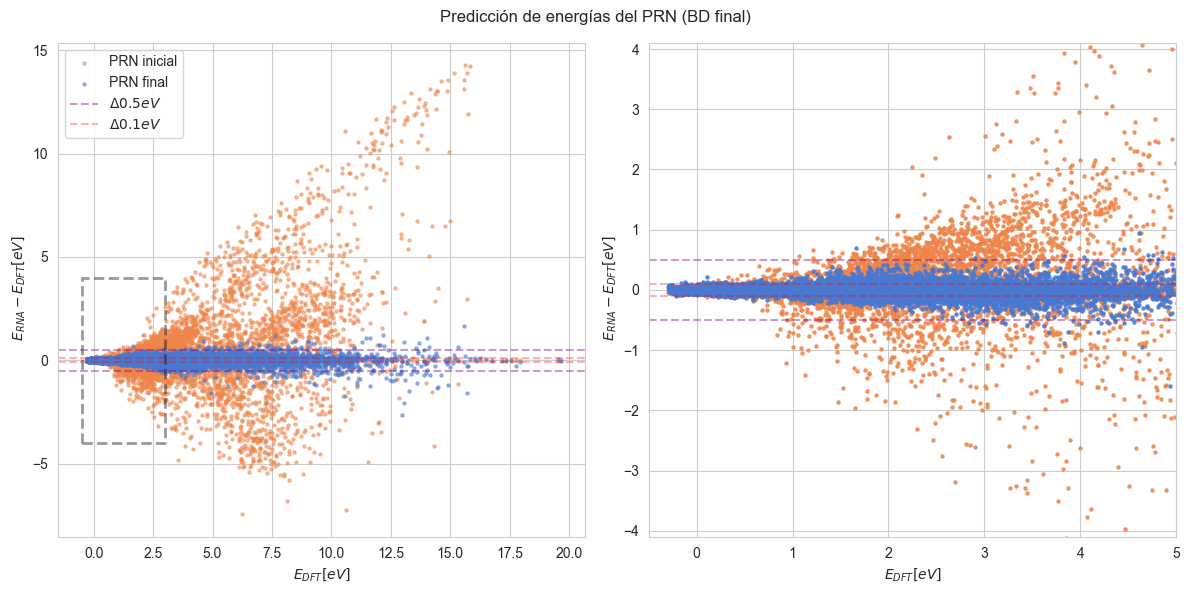

In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2, figsize=(12,6))

def plot_square(xmin, xmax, ymin, ymax, ax):
    # Define the coordinates for the square
    x = [xmin, xmax, xmax, xmin, xmin]
    y = [ymin, ymin, ymax, ymax, ymin]

    # Plot the square using the plot function
    ax.plot(x, y, color='black', linewidth=2, linestyle='--', alpha=0.4)
# Recuadro para hacer ZOOM
plot_square(-0.5, 3, -4, 4, ax[0]) 

NNini.plot(kind='scatter', x='DFT', y='delta_V', ax=ax[0], color = sns.color_palette("muted")[1] ,  s=5, alpha=0.5, label='PRN inicial')
NN15.plot( kind='scatter', x='DFT', y='delta_V', ax=ax[0], color = sns.color_palette("muted")[0], s=5, alpha=0.5, label='PRN final')
ax[0].axhline(y=-0.5, color='purple', linestyle = '--', alpha=0.4)
ax[0].axhline( y=0.5, color='purple', linestyle = '--', alpha=0.4, label=f'$\Delta 0.5 eV$')
ax[0].axhline(y=-0.1, color='red'   , linestyle = '--', alpha=0.3)
ax[0].axhline( y=0.1, color='red'   , linestyle = '--', alpha=0.3, label=f'$\Delta 0.1 eV$')


NNini.plot(kind='scatter', x='DFT', y='delta_V', ax=ax[1], color = sns.color_palette("muted")[1] ,  s=5, alpha=0.8, label=None)
NN15.plot( kind='scatter', x='DFT', y='delta_V', ax=ax[1], color = sns.color_palette("muted")[0], s=5, alpha=0.8, label=None)
ax[1].axhline( y=0.1, color='red', linestyle = '--', alpha=0.3)
ax[1].axhline(y=-0.1, color='red', linestyle = '--', alpha=0.3   )
ax[1].axhline(y=-0.5, color='purple', linestyle = '--', alpha=0.4)
ax[1].axhline( y=0.5, color='purple', linestyle = '--', alpha=0.4) 

ax[0].set_ylabel(' $ E_{RNA} - E_{DFT}[eV] $')
ax[0].set_xlabel('$E_{DFT} [eV]$')
ax[1].set_ylabel(' $ E_{RNA} - E_{DFT}[eV] $')
ax[1].set_xlabel('$E_{DFT} [eV]$')
# ax[0].set_xlim(-0.5,5)
ax[1].set_xlim(-0.5,5)
# ax[0].set_ylim(-15,15)
ax[1].set_ylim(-4.1,4.1)
fig.suptitle('Predicción de energías del PRN (BD final)')
ax[0].legend()
fig.tight_layout()
plt.show()

<Axes: >

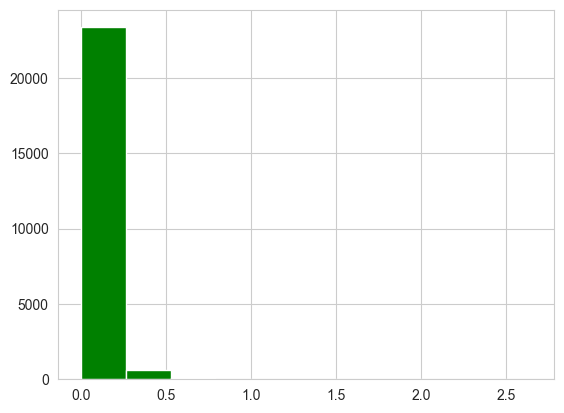

In [23]:
# round(np.abs(NNini['E_ann'] - NNini['E_dft']),3).hist(bins=10)
round(np.abs(NN15['E_ann'] - NN15['E_dft']),3).hist(bins=10)

# Histograma $Z_C$

In [24]:
df['Z_C'] = df['Z_C'] - 11.13482

<Axes: >

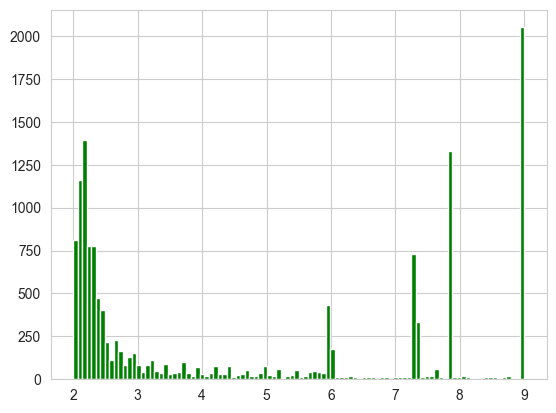

In [25]:
df.query('Z_C >2 & Z_C<9')['Z_C'].hist(bins=100)
sns.histplot()

In [26]:
df.NN.replace(['15','10','5'], '15', inplace= True)
df.NN.replace(['0'], 'inicial', inplace= True)

In [27]:
df['conf'] = df['conf'].str[:-4].astype('int')

In [28]:
df.shape

(24142, 4)

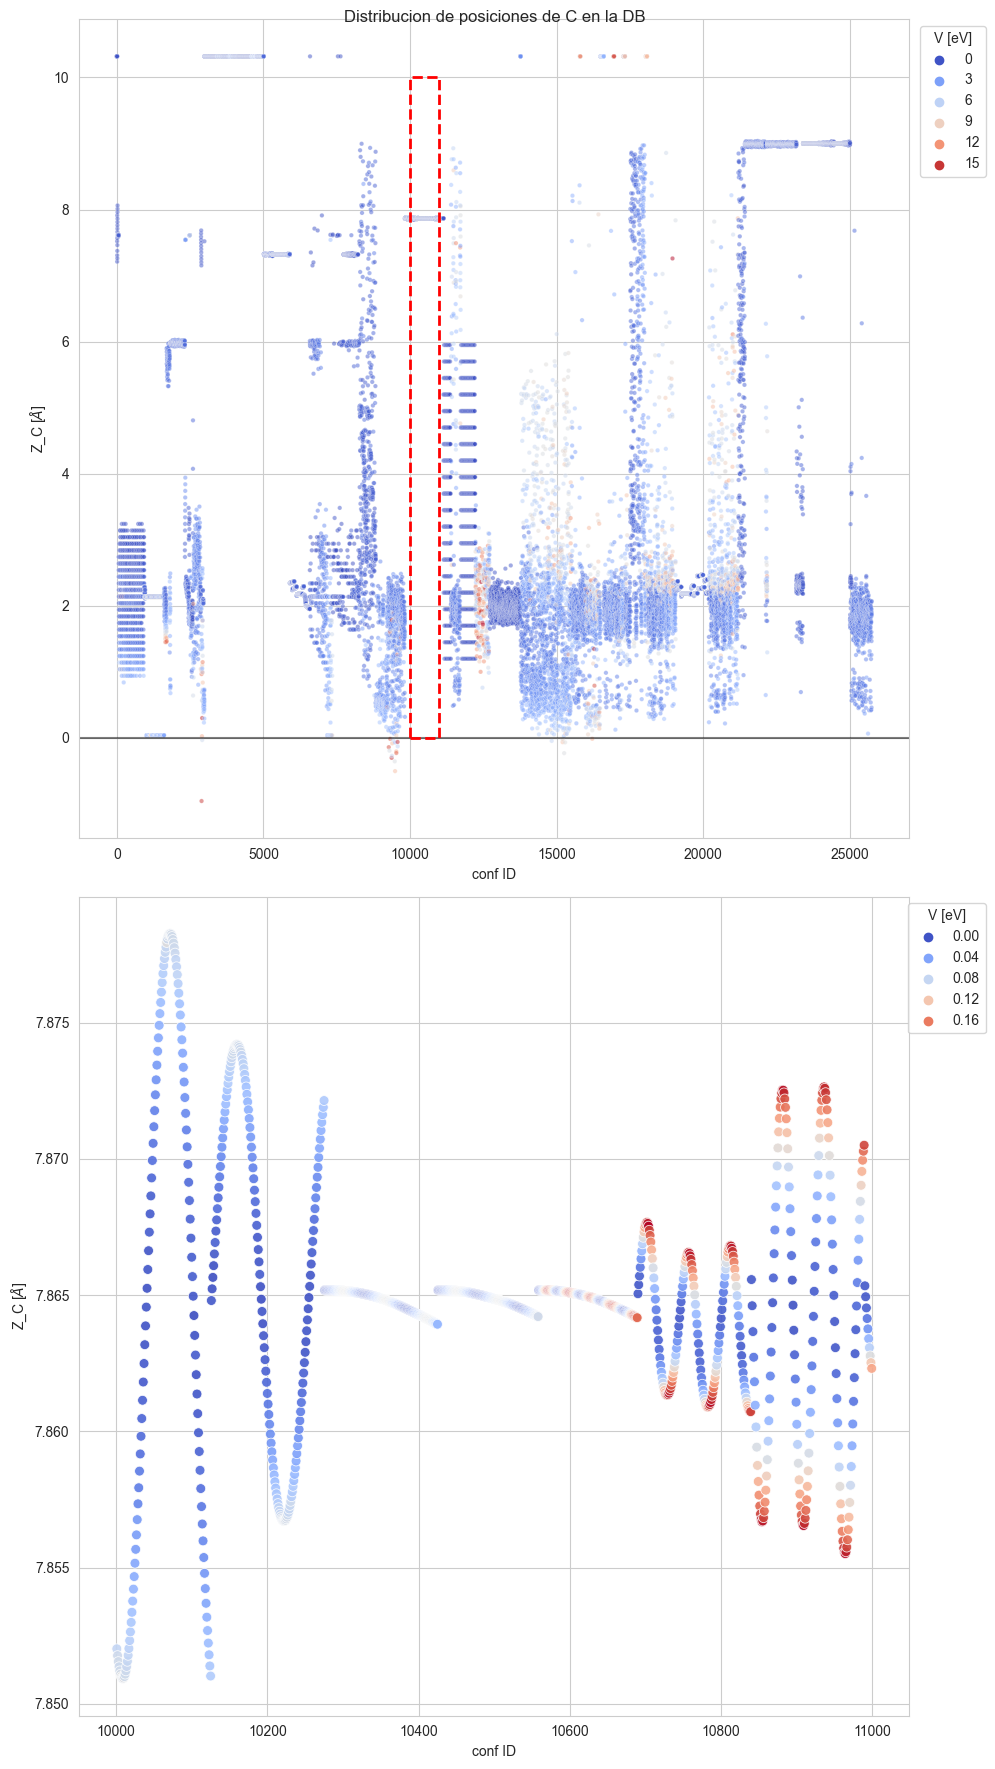

In [29]:
def plot_square(xmin, xmax, ymin, ymax, ax):
    # Define the coordinates for the square
    x = [xmin, xmax, xmax, xmin, xmin]
    y = [ymin, ymin, ymax, ymax, ymin]

    # Plot the square using the plot function
    ax.plot(x, y, color='r', linewidth=2, linestyle='--')
# Recuadro para hacer ZOOM
zmin=0
zmax=10
conf_min=10000
# conf_max=df.conf.max()
conf_max=11000
plot_square(conf_min, conf_max, zmin, zmax, ax[0]) 


fig, ax = plt.subplots(2,1, figsize = (10,18))

# Grilla general
sns.scatterplot(data=df,  x='conf', y='Z_C', hue='E_dft', palette='coolwarm', ax= ax[0], s=10, alpha=0.5)
ax[0].set_xlabel('conf ID')
ax[0].set_ylabel('Z_C [$\AA$]')
ax[0].axhline(y=0, color='black', alpha=0.5)


# Recuadro para hacer ZOOM
zmin=0
zmax=10
conf_min=10000
# conf_max=df.conf.max()
conf_max=11000
plot_square(conf_min, conf_max, zmin, zmax, ax[0]) 

# ZOOM
sns.scatterplot(data=df.query('Z_C>@zmin & Z_C<@zmax & conf > @conf_min & conf < @conf_max'),  x='conf', y='Z_C', hue='E_dft', palette='coolwarm',ax=ax[1], s=50, alpha=0.9)
ax[1].set_xlabel('conf ID')
ax[1].set_ylabel('Z_C [$\AA$]')
ax[1].legend(title='V [eV]',bbox_to_anchor=(1.1,1))
ax[0].legend(title='V [eV]',bbox_to_anchor=(1.1,1))
fig.suptitle('Distribucion de posiciones de C en la DB')
fig.tight_layout()
plt.show()